In [63]:
import pandas as pd
import numpy as np
import pyannote.audio
import librosa
import matplotlib.pyplot as plt
import librosa.display
import os

In [166]:
fname = '../data/raw/z-c-feisty.wav'
x, sr = librosa.load(fname)
#!ffmpeg -i ../data/raw/z-c-feisty.wav ../data/processed/z-c-feisty.mp3 

In [167]:
fname_rttm = '../data/processed/test.rttm'
speaker_track = pd.read_csv(fname_rttm,header=None,delim_whitespace=True,
            names = ['x1','filename','fileid','start','duration','skip1','skip2','speaker_id','skip3'])
speaker_track['end'] = speaker_track['start']+speaker_track['duration']
bins_speaker = pd.DataFrame({'name':speaker_track['speaker_id'].values},index = pd.IntervalIndex.from_arrays(left = speaker_track['start'],right=speaker_track['end']))
speaker_track.drop(['skip1','skip2','skip3'],axis=1,inplace = True)
speaker_track.head(2)

,x1,filename,fileid,start,duration,speaker_id,end
0,SPEAKER,z-c-feisty,1,0.07,0.21,speaker2,0.28
1,SPEAKER,z-c-feisty,1,0.28,0.08,speaker1,0.36


In [169]:
#librosa.output.write_wav('../data/raw/z-c-feisty.mp3', x, sr)
df = pd.DataFrame({"time":np.arange(x.shape[0])/sr,"amplitude":x})
tmp = df.sample(frac=0.005).sort_values('time')

In [188]:
def find_speaker(x):
    try:
        res =bins_speaker.loc[x,'name'].values[0]
    except:
        res=np.nan
    return res
#t = tmp.reset_index()
speaker_id = tmp['time'].apply(lambda x: find_speaker(x))
speaker_id.head()
tmp['speaker']  =speaker_id

nan

0.0
34.0
68.0
102.0
135.0
169.0
203.0
237.0
271.0
305.0
338.0


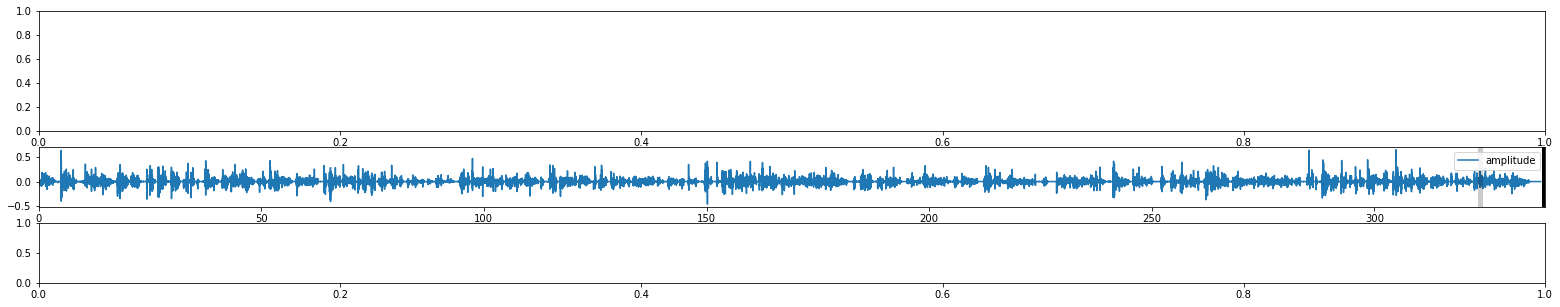

In [101]:
folder_output =os.path.splitext(fname)[0]
os.makedirs(folder_output,exist_ok=True)
fig,ax = plt.subplots(figsize=(27, 5),nrows=3,gridspec_kw = {'height_ratios':[2,1,1]})
tmp.plot(ax=ax[1])
sec=0
dsec= 15
line = ax[1].axvline(sec,c = 'k',linewidth=5)
line_l = ax[1].axvline(sec-dsec*0.95,c = 'k',alpha=0.2,linewidth=5)
line_r = ax[1].axvline(sec+dsec*0.95,c = 'k',alpha=0.2,linewidth=5)

line_top_panel = ax[0].axvline(sec,c = 'k',linewidth=5)
sub_tmp = tmp[(tmp.index>sec-dsec) & (tmp.index<sec+dsec)]
n_frames = 10
sec_per_frame = (df.index.max()+1) / n_frames
ax[1].set_xlim([0,df.index.max()+1])

for fr in np.arange(n_frames+1):
    sec = np.round(fr * sec_per_frame)
    sub_tmp = tmp[(tmp.index>sec-dsec) & (tmp.index<sec+dsec)]
    sub_tmp.plot(ax=ax[0],c='orange')
    
    line_top_panel = ax[0].axvline(sec,c = 'k',linewidth=5)
    fig_name = os.path.join(folder_output,f'{sec}.png')
    line.set_xdata([sec,sec])
    line_l.set_xdata(sec-dsec*0.95)
    line_r.set_xdata(sec+dsec*0.95)
    fig.savefig(fig_name)
    ax[0].clear()
    print(sec)

In [75]:
l = ax.axvline(sec,c = 'k',linewidth=5)
    

In [84]:
f = tmp.plot(ax=ax)

In [86]:
ax.cl